# SETUP

## Loading Library

In [149]:
#install.packages("caret")
#install.packages("tidyverse")
#install.packages("bartMachine")
#install.packages("doParallel")
library(caret)
library(tidyverse)
options(java.parameters = "-Xmx32g")
library(bartMachine)

In [150]:
#Include the parallel library. If the next line does not work, run install.packages(“parallel”) first
library(parallel)
library(doParallel)

# Use the detectCores() function to find the number of cores in system
n_cores <- detectCores()
print(n_cores)
cl <- makePSOCKcluster(n_cores)
#registerDoParallel(cl)
#stopCluster(cl)

[1] 16


## Loading Data

In [16]:
happiness.df <- read_csv(file="datasets/world-happiness/happiness.csv")
colnames(happiness.df) <- make.names(colnames(happiness.df) %>%  tolower)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  Country = col_character(),
  Region = col_character(),
  `Happiness Rank` = col_double(),
  `Happiness Score` = col_double(),
  `Economy (GDP per Capita)` = col_double(),
  Family = col_double(),
  `Health (Life Expectancy)` = col_double(),
  Freedom = col_double(),
  `Trust (Government Corruption)` = col_double(),
  Generosity = col_double(),
  `Dystopia Residual` = col_double(),
  year = col_double(),
  nyears = col_double()
)


We can get the train-test split using createDataPartition from caret:

In [17]:
happiness.df <- happiness.df %>% select_if(is_double) %>% select(-c(x1,happiness.rank,dystopia.residual))

In [18]:
set.seed(42)
trainIndex <- createDataPartition(happiness.df$happiness.score, p = 0.9, list = FALSE)
happy.train <- happiness.df[ trainIndex,]
happy.test  <- happiness.df[-trainIndex,]

In [83]:
summary(happiness.df)

 happiness.score economy..gdp.per.capita.     family      
 Min.   :2.693   Min.   :0.0000           Min.   :0.0000  
 1st Qu.:4.509   1st Qu.:0.6053           1st Qu.:0.7930  
 Median :5.282   Median :0.9954           Median :1.0257  
 Mean   :5.371   Mean   :0.9278           Mean   :0.9903  
 3rd Qu.:6.234   3rd Qu.:1.2524           3rd Qu.:1.2287  
 Max.   :7.587   Max.   :1.8708           Max.   :1.6106  
 health..life.expectancy.    freedom       trust..government.corruption.
 Min.   :0.0000           Min.   :0.0000   Min.   :0.00000              
 1st Qu.:0.4023           1st Qu.:0.2976   1st Qu.:0.07579              
 Median :0.6301           Median :0.4183   Median :0.13908              
 Mean   :0.5800           Mean   :0.4028   Mean   :0.17561              
 3rd Qu.:0.7683           3rd Qu.:0.5169   3rd Qu.:0.24984              
 Max.   :1.0252           Max.   :0.6697   Max.   :0.83808              
   generosity          year          nyears     
 Min.   :0.0000   Min.   :2

In [183]:
happiness.df %>% head

happiness.score,economy..gdp.per.capita.,family,health..life.expectancy.,freedom,trust..government.corruption.,generosity,year,nyears
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,3
7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,3
7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,3
7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,3
7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,3
7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015,3


## bartMachine with caret

In [62]:
registerDoParallel(cl)

In [63]:
set_bart_machine_num_cores(n_cores)

bartMachine now using 16 cores.


Training: Run in 1hr 16 minutes on 4 cores:

In [64]:
print("Done")

[1] "Done"


In [22]:
t.start <- Sys.time()
happy.bm <- train(happiness.score ~ ., data = happy.train, 
                 method = "bartMachine", 
                 verbose = TRUE,
                 serialize = TRUE)
t.final <- Sys.time() - t.start

bartMachine initializing with 50 trees...
bartMachine vars checked...
bartMachine java init...
bartMachine factors created...
bartMachine before preprocess...
bartMachine after preprocess... 9 total features...
bartMachine sigsq estimated...
bartMachine training data finalized...
Now building bartMachine for regression ...
evaluating in sample data...done
serializing in order to be saved for future R sessions...done


In [104]:
happy.bm

Bayesian Additive Regression Trees 

426 samples
  8 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 426, 426, 426, 426, 426, 426, ... 
Resampling results across tuning parameters:

  k  alpha  beta  nu  RMSE       Rsquared   MAE      
  2  0.900  1     2   0.6837279  0.6846792  0.5403639
  2  0.900  1     3   0.6924931  0.6760583  0.5452861
  2  0.900  1     4   0.6902293  0.6782548  0.5418241
  2  0.900  2     2   0.6045299  0.7413463  0.4730452
  2  0.900  2     3   0.6001721  0.7416791  0.4679488
  2  0.900  2     4   0.5985336  0.7447437  0.4637987
  2  0.900  3     2   0.5771982  0.7583154  0.4477865
  2  0.900  3     3   0.5699173  0.7642371  0.4426494
  2  0.900  3     4   0.5681177  0.7639420  0.4405992
  2  0.945  1     2   0.6977266  0.6745144  0.5454534
  2  0.945  1     3   0.7021010  0.6730313  0.5481543
  2  0.945  1     4   0.6841914  0.6838504  0.5371774
  2  0.945  2     2   0.6149406  0.7315122  0.4777512
  2  0.945  2     3 

In [107]:
print(t.final)

Time difference of 1.751271 secs


In [33]:
summary(happy.bm)

bartMachine v1.2.3 for regression

training data n = 426 and p = 8 
built in 2.9 secs on 16 cores, 50 trees, 250 burn-in and 1000 post. samples

sigsq est for y beforehand: 0.301 
avg sigsq estimate after burn-in: 0.22749 

in-sample statistics:
 L1 = 146.24 
 L2 = 83.68 
 rmse = 0.44 
 Pseudo-Rsq = 0.8505
p-val for shapiro-wilk test of normality of residuals: 0.08459 
p-val for zero-mean noise: 0.96012 



In [105]:
saveRDS(happy.bm,file = "model_files/bart_caret_model_v1_20191120.RDS")

In [106]:
happy.bm.read <- readRDS(file = "model_files/bart_caret_model_v1_20191120.RDS")

In [50]:
summary(happy.bm.read)

bartMachine v1.2.3 for regression

training data n = 426 and p = 8 
built in 2.9 secs on 16 cores, 50 trees, 250 burn-in and 1000 post. samples

sigsq est for y beforehand: 0.301 
avg sigsq estimate after burn-in: 0.22749 

in-sample statistics:
 L1 = 146.24 
 L2 = 83.68 
 rmse = 0.44 
 Pseudo-Rsq = 0.8505
p-val for shapiro-wilk test of normality of residuals: 0.08459 
p-val for zero-mean noise: 0.96012 



In [59]:
check_bart_error_assumptions(happy.bm$finalModel)

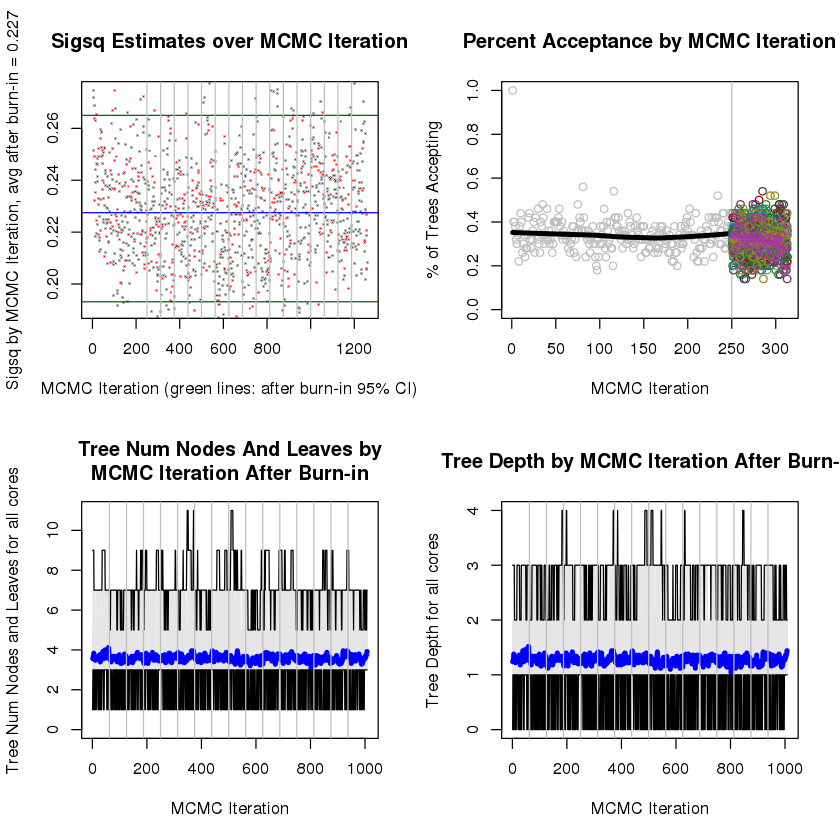

In [56]:
plot_convergence_diagnostics(happy.bm$finalModel)

In [37]:
happy.pred <- predict(happy.bm,newdata = happy.test)

In [90]:
stopCluster(cl)

In [96]:
calc_credible_intervals(happy.bm$finalModel, new_data = happy.test %>% select(-happiness.score))

ci_lower_bd,ci_upper_bd
6.526277,7.228977
6.105762,6.897835
6.493796,7.235869
6.207863,7.072022
5.665108,6.373455
6.056397,6.952849
5.302827,5.944557
6.072621,6.828097
5.301707,6.124615
3.476286,4.441320


In [92]:
varImp(happy.bm)

.....


bartMachine variable importance

                              Overall
health..life.expectancy.      100.000
family                         95.768
economy..gdp.per.capita.       81.131
freedom                        78.306
year                           48.210
nyears                         15.836
trust..government.corruption.   4.171
generosity                      0.000

In [39]:
postResample(pred = happy.pred, happy.test$happiness.score)

RMSE  Rsquared       MAE 
0.5386856 0.7344194 0.3817735

## bartMachine caret with CV

In [151]:
tr.control <- trainControl(## 10-fold CV
                           method = "cv",
                           number = 10)
#                            ## repeated ten times
#                            ,repeats = 10)

In [159]:
grid.search <- expand_grid(num_trees = seq(50,100,25),
                          k = 2, alpha = 0.95, beta = 9, nu = 3)

In [173]:
cl <- makePSOCKcluster(n_cores)
registerDoParallel(cl)

In [174]:
t.start <- Sys.time()
happy.bmcv <- train(happiness.score ~ ., data = happy.train, 
                 method = "bartMachine", 
                 verbose = TRUE,
                 serialize = TRUE,
                 trControl = tr.control)
t.final <- Sys.time() - t.start

bartMachine initializing with 50 trees...
bartMachine vars checked...
bartMachine java init...
bartMachine factors created...
bartMachine before preprocess...
bartMachine after preprocess... 9 total features...
bartMachine sigsq estimated...
bartMachine training data finalized...
Now building bartMachine for regression ...
evaluating in sample data...done
serializing in order to be saved for future R sessions...done


In [177]:
print(t.final)

Time difference of 6.613744 mins


In [175]:
stopCluster(cl)

In [176]:
happy.bmcv

Bayesian Additive Regression Trees 

426 samples
  8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 382, 383, 382, 385, 384, 384, ... 
Resampling results across tuning parameters:

  k  alpha  beta  nu  RMSE       Rsquared   MAE      
  2  0.900  1     2   0.4962995  0.8141137  0.3904148
  2  0.900  1     3   0.4945890  0.8136791  0.3894511
  2  0.900  1     4   0.5020010  0.8083533  0.3928301
  2  0.900  2     2   0.5013565  0.8108282  0.3899022
  2  0.900  2     3   0.5004296  0.8108698  0.3910931
  2  0.900  2     4   0.5032337  0.8077598  0.3930836
  2  0.900  3     2   0.4998619  0.8118413  0.3907459
  2  0.900  3     3   0.5023749  0.8098818  0.3919028
  2  0.900  3     4   0.5050152  0.8075930  0.3902033
  2  0.945  1     2   0.5082737  0.8030154  0.4010160
  2  0.945  1     3   0.4907418  0.8184885  0.3875898
  2  0.945  1     4   0.4994482  0.8117310  0.3930287
  2  0.945  2     2   0.5038680  0.8093094  0.3961651
  2  0.945  2    

In [179]:
saveRDS(happy.bmcv ,"model_files/bartMachine_happybmcv_model_v1_20191120.RDS")

In [ ]:
happy.bmcv.read <- readRDS("model_files/bartMachine_happybmcv_model_v1_20191120.RDS")

## bartMachine without caret

In [63]:
set_bart_machine_num_cores(n_cores)

bartMachine now using 16 cores.


In [67]:
t.start <- Sys.time()
happy.bm.2 <- bartMachine(X = data.frame(happy.train %>% select(-happiness.score)), y = happy.train$happiness.score,
            verbose = TRUE, 
            serialize =  TRUE)
t.final <- Sys.time() - t.start

bartMachine initializing with 50 trees...
bartMachine vars checked...
bartMachine java init...
bartMachine factors created...
bartMachine before preprocess...
bartMachine after preprocess... 9 total features...
bartMachine sigsq estimated...
bartMachine training data finalized...
Now building bartMachine for regression ...
evaluating in sample data...done
serializing in order to be saved for future R sessions...done


In [180]:
saveRDS(happy.bm.2,"model_files/bartMachine_happybm2_model_v1_20191120.RDS")

In [181]:
happy.bm.2.read <- readRDS("model_files/bartMachine_happybm2_model_v1_20191120.RDS")

In [70]:
print(t.final)

Time difference of 1.751271 secs


In [100]:
summary(happy.bm.2.read)

bartMachine v1.2.3 for regression

training data n = 426 and p = 8 
built in 1 secs on 16 cores, 50 trees, 250 burn-in and 1000 post. samples

sigsq est for y beforehand: 0.301 
avg sigsq estimate after burn-in: 0.18606 

in-sample statistics:
 L1 = 124.38 
 L2 = 59.3 
 rmse = 0.37 
 Pseudo-Rsq = 0.894
p-val for shapiro-wilk test of normality of residuals: 0.3311 
p-val for zero-mean noise: 0.94996 



In [101]:
happy.pred.2 <- predict(happy.bm.2.read, new_data = data.frame(happy.test %>% select(-happiness.score)))

In [103]:
postResample(pred = happy.pred.2, happy.test$happiness.score)

RMSE  Rsquared       MAE 
0.5186807 0.7536941 0.3790645

In [87]:
check_bart_error_assumptions(happy.bm.2)

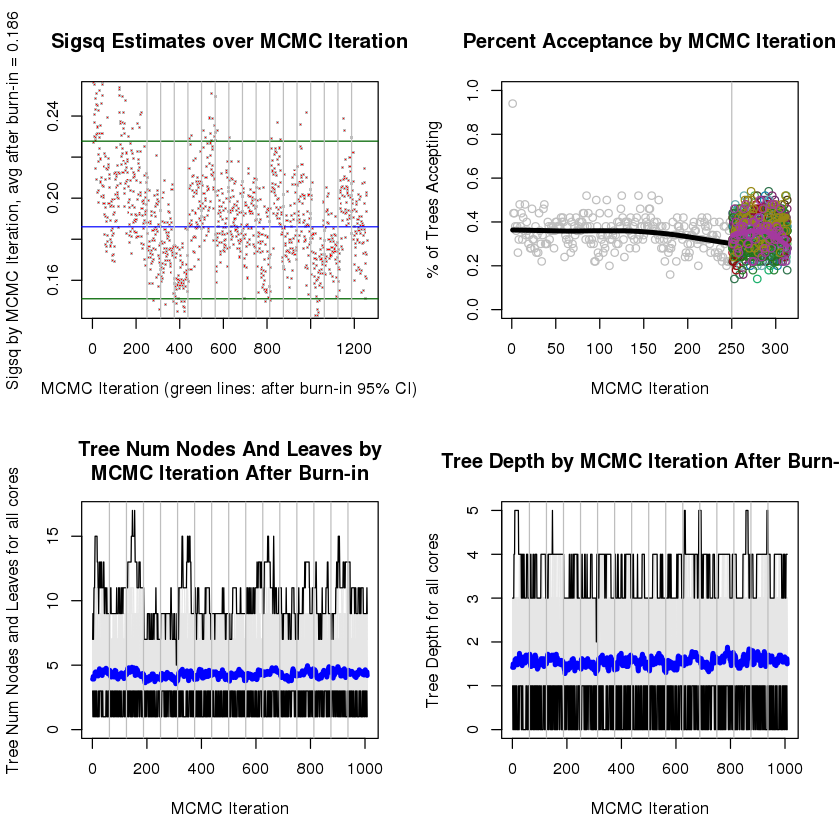

In [88]:
plot_convergence_diagnostics(happy.bm.2)

In [108]:
install.packages("BART")

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)


In [109]:
library(BART)

Loading required package: nlme

Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

Loading required package: nnet
Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster



In [185]:
data(benchmark_datasets)